<a href="https://colab.research.google.com/github/boneeyah/QTW/blob/main/Case_Study_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import arange
import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/all_train.csv')

print(df)

         # label        f0        f1        f2        f3        f4        f5  \
0            1.0 -0.346368  0.416306  0.999236  0.475342  0.427493 -0.005984   
1            1.0  1.708236 -0.319394 -1.241873 -0.887231 -0.871906 -0.005984   
2            0.0 -0.360693  1.794174  0.264738 -0.472273 -0.292344 -1.054221   
3            1.0 -0.377914 -0.103932 -0.649434 -2.125015 -1.643797 -0.005984   
4            0.0 -0.067436 -0.636762 -0.620166 -0.062551  1.588715 -0.005984   
...          ...       ...       ...       ...       ...       ...       ...   
6999995      0.0  1.617264 -0.537084 -1.275867  0.650799 -1.511621  0.850488   
6999996      0.0 -0.511357  0.270927  0.085989 -0.243802 -1.035668 -0.005984   
6999997      1.0  0.062408 -0.987203  0.570667  1.517195  0.639548 -1.054221   
6999998      1.0  1.659131  1.096223  0.562821  1.627193  0.767236 -1.054221   
6999999      1.0  0.002034  0.744152 -0.908839 -0.770454  1.008405 -1.054221   

               f6        f7        f8  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [5]:
df.tail()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000
6999999,1.0,0.002034,0.744152,-0.908839,-0.770454,1.008405,-1.054221,-0.370155,0.296837,-1.492524,...,0.352893,0.671047,0.176512,-0.573682,0.314739,0.304983,0.425471,-0.612085,-0.925097,499.999969


In [6]:
df = df.drop(columns=['f25'])

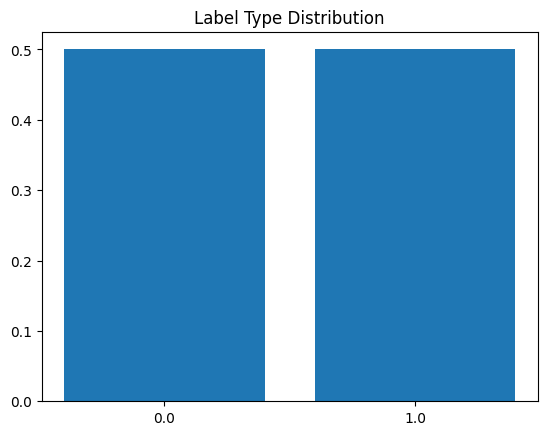

In [7]:
plt.bar(df['# label'].astype(str).value_counts(normalize=True).index.sort_values(ascending=True),df['# label'].value_counts(normalize=True))
plt.title('Label Type Distribution')
plt.show()

In [8]:
df['# label'].value_counts(normalize=True)



1.0    0.500126
0.0    0.499874
Name: # label, dtype: float64

In [9]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f17,f18,f19,f20,f21,f22,f23,f24,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,4.960189e-03,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.001006e+00,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-8.154401e-01,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.154401e-01,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,1.226331e+00,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,1.226331e+00,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,4.444690e+00,1.500000e+03


In [10]:
df = df.dropna()

In [11]:

# Make dataframe for model input
X = df.loc[:, df.columns != '# label']

#one hot encoding categorical variables for model
cols = X.columns
num_cols = X._get_numeric_data().columns

#creating dataframe of numeric columns
scaler = MinMaxScaler()
num_df = scaler.fit_transform(X[num_cols])

X=pd.DataFrame(num_df,columns=X[num_cols].columns, index=X[num_cols].index)

#save column names
col_names = X.columns
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f17,f18,f19,f20,f21,f22,f23,f24,f26,mass
0,0.254650,0.588009,0.788389,0.740048,0.623429,0.189321,0.743823,0.562388,0.952320,1.0,...,0.0,0.768115,0.558643,0.609172,1.0,0.644207,0.645678,0.569167,0.686754,0.50
1,0.578779,0.432491,0.141518,0.643605,0.248326,0.189321,0.449102,0.311728,0.689445,1.0,...,1.0,0.072438,0.307730,0.071580,0.0,0.177375,0.297553,0.570668,0.344720,0.25
2,0.252390,0.879274,0.576384,0.672976,0.415631,0.000000,0.278942,0.757963,0.866808,1.0,...,1.0,0.069624,0.618062,0.040736,0.0,0.282651,0.269650,0.570633,0.159161,0.25
3,0.249673,0.478037,0.312518,0.555995,0.025501,0.189321,0.598937,0.311344,0.343659,1.0,...,0.0,0.288630,0.498519,0.814225,0.0,0.307117,0.307209,0.569241,0.446836,0.75
4,0.298653,0.365404,0.320966,0.701976,0.958644,0.189321,0.361130,0.275334,0.597378,0.0,...,0.0,0.154773,0.189167,0.337358,1.0,0.413126,0.336491,0.622898,0.227324,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.564428,0.386474,0.131706,0.752467,0.063657,0.344007,0.537544,0.490021,0.710549,1.0,...,0.0,0.315039,0.289468,0.241809,1.0,0.293401,0.313252,0.566916,0.409828,0.25
6999996,0.228621,0.557278,0.524790,0.689147,0.201053,0.189321,0.430424,0.630711,0.905604,0.0,...,1.0,0.093858,0.799522,0.195683,0.0,0.157785,0.350154,0.573714,0.327341,0.75
6999997,0.319137,0.291325,0.664687,0.813790,0.684644,0.000000,0.614352,0.728691,0.208745,1.0,...,0.0,0.331697,0.695520,0.444203,0.0,0.421530,0.409908,0.569501,0.637207,1.00
6999998,0.571033,0.731735,0.662423,0.821576,0.721504,0.000000,0.609135,0.528119,0.092428,0.0,...,1.0,0.139159,0.432279,0.335812,0.0,0.427892,0.426646,0.585171,0.523604,1.00


In [12]:
#creating dataframe to find where there is high readmitted rates for a variable
y = df[['# label']].astype(np.float16)
#y_alt = pd.get_dummies(y_alt, columns=y_alt.columns)

In [13]:
y.astype(bool)

,# label
0,True
1,True
2,False
3,True
4,False
...,...
6999995,False
6999996,False
6999997,True
6999998,True


In [14]:
del(df)
del(num_df)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_test = tf.convert_to_tensor(X_test)

In [17]:
X_train = tf.convert_to_tensor(X_train)

In [18]:
del(X)

In [19]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(27,)))
model1.add(tf.keras.layers.Dense(100, activation='relu',name="Relu1"))
model1.add(tf.keras.layers.Dense(79, activation='relu', name="Relu2"))
model1.add(tf.keras.layers.Dense(56, activation='relu', name="Relu3"))
model1.add(tf.keras.layers.Dense(23, activation='relu', name="Relu4"))
model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))

model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = [tf.keras.metrics.AUC(from_logits=True), 'accuracy'])

In [20]:
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=5,
                                   restore_best_weights=True)
now = datetime.datetime.now

In [21]:
t = now()
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es])
print(' Training Time: %s' % (now() -t))

Epoch 1/100
140000/140000 [==============================] - 499s 4ms/step - loss: 0.3043 - auc: 0.9419 - accuracy: 0.8605 - val_loss: 0.2823 - val_auc: 0.9493 - val_accuracy: 0.8701
Epoch 2/100
140000/140000 [==============================] - 491s 4ms/step - loss: 0.2895 - auc: 0.9476 - accuracy: 0.8695 - val_loss: 0.2853 - val_auc: 0.9492 - val_accuracy: 0.8675
Epoch 3/100
140000/140000 [==============================] - 491s 4ms/step - loss: 0.2858 - auc: 0.9489 - accuracy: 0.8718 - val_loss: 0.2807 - val_auc: 0.9510 - val_accuracy: 0.8725
Epoch 4/100
140000/140000 [==============================] - 490s 3ms/step - loss: 0.2836 - auc: 0.9497 - accuracy: 0.8731 - val_loss: 0.2782 - val_auc: 0.9519 - val_accuracy: 0.8737
Epoch 5/100
140000/140000 [==============================] - 488s 3ms/step - loss: 0.2823 - auc: 0.9502 - accuracy: 0.8738 - val_loss: 0.2762 - val_auc: 0.9520 - val_accuracy: 0.8733
Epoch 6/100
140000/140000 [==============================] - 490s 3ms/step - loss: 0.

In [22]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(27,)))
model2.add(tf.keras.layers.Dense(128, activation='relu',name="Relu1"))
model2.add(tf.keras.layers.Dense(64, activation='relu', name="Relu2"))
model2.add(tf.keras.layers.Dense(16, activation='relu', name="Relu4"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = [tf.keras.metrics.AUC(from_logits=True), 'accuracy'])

In [23]:
es2 = EarlyStopping(monitor='val_loss',
                                   mode='min', # don't minimize the accuracy!
                                   patience=5,
                                   restore_best_weights=True)

In [24]:
t = now()
model2.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es2])
print(' Training Time: %s' % (now() -t))

Epoch 1/100
35000/35000 [==============================] - 118s 3ms/step - loss: 0.3191 - auc_1: 0.9370 - accuracy: 0.8542 - val_loss: 0.2856 - val_auc_1: 0.9484 - val_accuracy: 0.8678
Epoch 2/100
35000/35000 [==============================] - 115s 3ms/step - loss: 0.3007 - auc_1: 0.9444 - accuracy: 0.8655 - val_loss: 0.2814 - val_auc_1: 0.9502 - val_accuracy: 0.8715
Epoch 3/100
35000/35000 [==============================] - 114s 3ms/step - loss: 0.2948 - auc_1: 0.9465 - accuracy: 0.8688 - val_loss: 0.2794 - val_auc_1: 0.9513 - val_accuracy: 0.8734
Epoch 4/100
35000/35000 [==============================] - 114s 3ms/step - loss: 0.2922 - auc_1: 0.9475 - accuracy: 0.8704 - val_loss: 0.2745 - val_auc_1: 0.9524 - val_accuracy: 0.8748
Epoch 5/100
35000/35000 [==============================] - 113s 3ms/step - loss: 0.2906 - auc_1: 0.9480 - accuracy: 0.8711 - val_loss: 0.2764 - val_auc_1: 0.9522 - val_accuracy: 0.8745
Epoch 6/100
35000/35000 [==============================] - 114s 3ms/step - 

In [25]:
p = model2.predict(X_test)
p = np.round(p,0)

43750/43750 [==============================] - 52s 1ms/step


In [29]:
np.savetxt("predictionsM2.csv",p,delimiter=",")

In [26]:
classification_results = classification_report(y_test, p,output_dict=True)
classification_results

{'0.0': {'precision': 0.9085013743205433,
  'recall': 0.8433957757337113,
  'f1-score': 0.8747388182308398,
  'support': 699151},
 '1.0': {'precision': 0.8541984041589875,
  'recall': 0.915264200990513,
  'f1-score': 0.8836775839112936,
  'support': 700849},
 'accuracy': 0.8793735714285714,
 'macro avg': {'precision': 0.8813498892397654,
  'recall': 0.8793299883621122,
  'f1-score': 0.8792082010710667,
  'support': 1400000},
 'weighted avg': {'precision': 0.881316958367146,
  'recall': 0.8793735714285714,
  'f1-score': 0.8792136217939688,
  'support': 1400000}}

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 128)               3584      
                                                                 
 Relu2 (Dense)               (None, 64)                8256      
                                                                 
 Relu4 (Dense)               (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Activation (Dense)          (None, 1)                 17        
                                                                 
Total params: 12,897
Trainable params: 12,897
Non-trainable params: 0
_________________________________________________________________


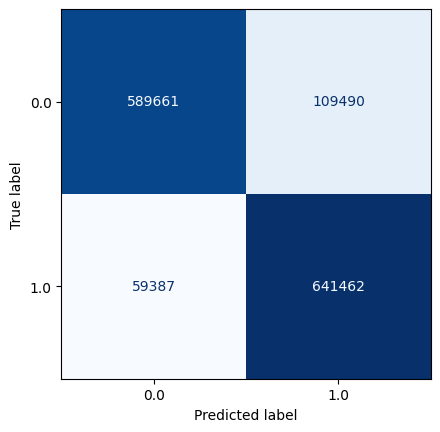

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,p,colorbar=False,cmap='Blues')


In [30]:
p1 = model1.predict(X_test)
p1 = np.round(p1,0)
np.savetxt("predictionsM1.csv",p1,delimiter=",")

43750/43750 [==============================] - 55s 1ms/step


In [31]:
classification_results1 = classification_report(y_test, p1,output_dict=True)
classification_results1

{'0.0': {'precision': 0.8969482929001069,
  'recall': 0.8529316270734076,
  'f1-score': 0.8743863600373023,
  'support': 699151},
 '1.0': {'precision': 0.8601350184109832,
  'recall': 0.902242851170509,
  'f1-score': 0.880685901471301,
  'support': 700849},
 'accuracy': 0.8776171428571429,
 'macro avg': {'precision': 0.878541655655545,
  'recall': 0.8775872391219584,
  'f1-score': 0.8775361307543017,
  'support': 1400000},
 'weighted avg': {'precision': 0.878519331034087,
  'recall': 0.8776171428571429,
  'f1-score': 0.8775399509762141,
  'support': 1400000}}

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 100)               2800      
                                                                 
 Relu2 (Dense)               (None, 79)                7979      
                                                                 
 Relu3 (Dense)               (None, 56)                4480      
                                                                 
 Relu4 (Dense)               (None, 23)                1311      
                                                                 
 dropout (Dropout)           (None, 23)                0         
                                                                 
 Activation (Dense)          (None, 1)                 24        
                                                                 
Total params: 16,594
Trainable params: 16,594
Non-traina

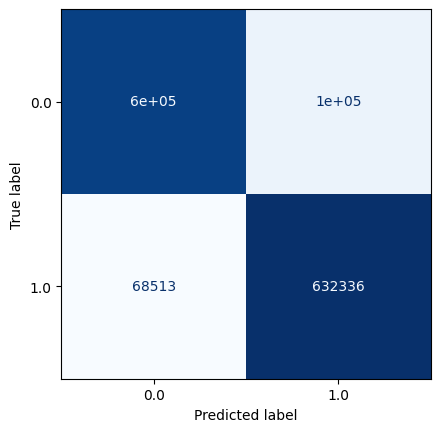

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,p1,colorbar=False,cmap='Blues')
